In [16]:
#standard libraries
import pandas as pd
import numpy as np
import tensorflow as tf

#visualization
import matplotlib.pyplot as plt
import mpld3
from mpld3 import plugins
import seaborn as sns


In [17]:
data = pd.read_csv('./dataframes/clean_data.csv')
data = data[['DateTime', 'MsgNr']]
pivot_df = data.pivot_table(index='DateTime', columns='MsgNr', aggfunc=len, fill_value=0)


In [18]:
# alarms = pd.read_csv("./dataframes/pivot_alarms_cleaned.csv") This is for the preprocessing for the correlation matrix and jacc index
alarms = pivot_df.copy()
alarms_cor = alarms.copy()
alarms.head()

MsgNr,2421,2445,4074,4203,6269,6279,6280,6336,7167,9218,...,22020,22021,22022,22024,22040,22045,24324,35002,49317,50217
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 05:49:49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2022-01-03 08:41:45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-03 08:44:22,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-03 08:46:40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-03 09:07:11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
grouped = alarms.groupby('DateTime').sum()

# alarms coactivations

In [20]:
import itertools

# Assuming your binary alarms_corset is stored in a pandas alarms_corFrame called 'alarms_cor'
# Extract the columns containing binary values
columns = alarms_cor.columns[1:]  # Exclude the DateTime column

# Create a list to store Jaccard similarity indices
jaccard_indices = []

# Iterate through all possible pairs of columns
for pair in itertools.combinations(columns, 2):
    column1, column2 = pair
    intersection = ((alarms_cor[column1] == 1) & (alarms_cor[column2] == 1)).sum()
    union = ((alarms_cor[column1] == 1) | (alarms_cor[column2] == 1)).sum()
    jaccard_index = intersection / union
    jaccard_indices.append((pair, jaccard_index))

# Print the computed Jaccard similarity indices for each pair
for pair, jaccard_index in jaccard_indices:
    print(pair, jaccard_index)

(2445, 4074) 0.0
(2445, 4203) 0.0
(2445, 6269) 0.0
(2445, 6279) 0.0
(2445, 6280) 0.0
(2445, 6336) 0.0
(2445, 7167) 0.00015599407222525544
(2445, 9218) 0.0
(2445, 9219) 0.00032181935207037116
(2445, 9351) 0.0
(2445, 9352) 0.0
(2445, 9495) 0.0
(2445, 11225) 0.0
(2445, 11226) 0.0
(2445, 11227) 0.0
(2445, 11228) 0.0
(2445, 11231) 0.0
(2445, 11232) 0.0
(2445, 15042) 0.0
(2445, 15053) 0.0
(2445, 16056) 0.0
(2445, 16226) 0.0
(2445, 18023) 0.0
(2445, 22017) 0.0
(2445, 22018) 0.0
(2445, 22019) 0.0
(2445, 22020) 0.0
(2445, 22021) 0.0
(2445, 22022) 0.0
(2445, 22024) 0.0
(2445, 22040) 0.0
(2445, 22045) 0.0
(2445, 24324) 0.00029726516052318666
(2445, 35002) 0.0
(2445, 49317) 0.0
(2445, 50217) 0.0
(4074, 4203) 9.323140033563304e-05
(4074, 6269) 0.0
(4074, 6279) 5.323112956456936e-05
(4074, 6280) 9.269988412514484e-05
(4074, 6336) 0.0
(4074, 7167) 0.0
(4074, 9218) 0.0
(4074, 9219) 0.0
(4074, 9351) 0.00023938716884774975
(4074, 9352) 0.0
(4074, 9495) 0.00013875398917718884
(4074, 11225) 0.0
(4074, 112

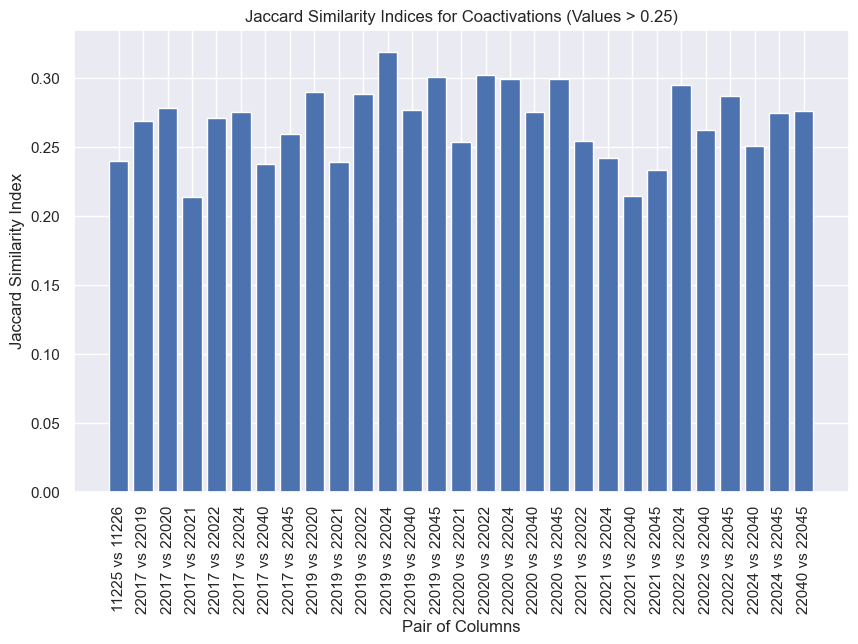

In [21]:
import matplotlib.pyplot as plt

# Assuming you have the computed Jaccard similarity indices in a list called 'jaccard_indices'
pairs, indices = zip(*jaccard_indices)

# Extract the names of the pairs for labeling the x-axis
pair_names = [f'{pair[0]} vs {pair[1]}' for pair in pairs]
# Filter the indices and pairs to include only values greater than 0
filtered_indices, filtered_pairs = zip(*[(index, pair) for index, pair in zip(indices, pairs) if index >0.2])

# Extract the names of the pairs for labeling the x-axis
pair_names = [f'{pair[0]} vs {pair[1]}' for pair in filtered_pairs]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(pair_names, filtered_indices)
plt.xticks(rotation=90)
plt.xlabel('Pair of Columns')
plt.ylabel('Jaccard Similarity Index')
plt.title('Jaccard Similarity Indices for Coactivations (Values > 0.25)')

# Display the plot
plt.show()


<Axes: xlabel='MsgNr', ylabel='MsgNr'>

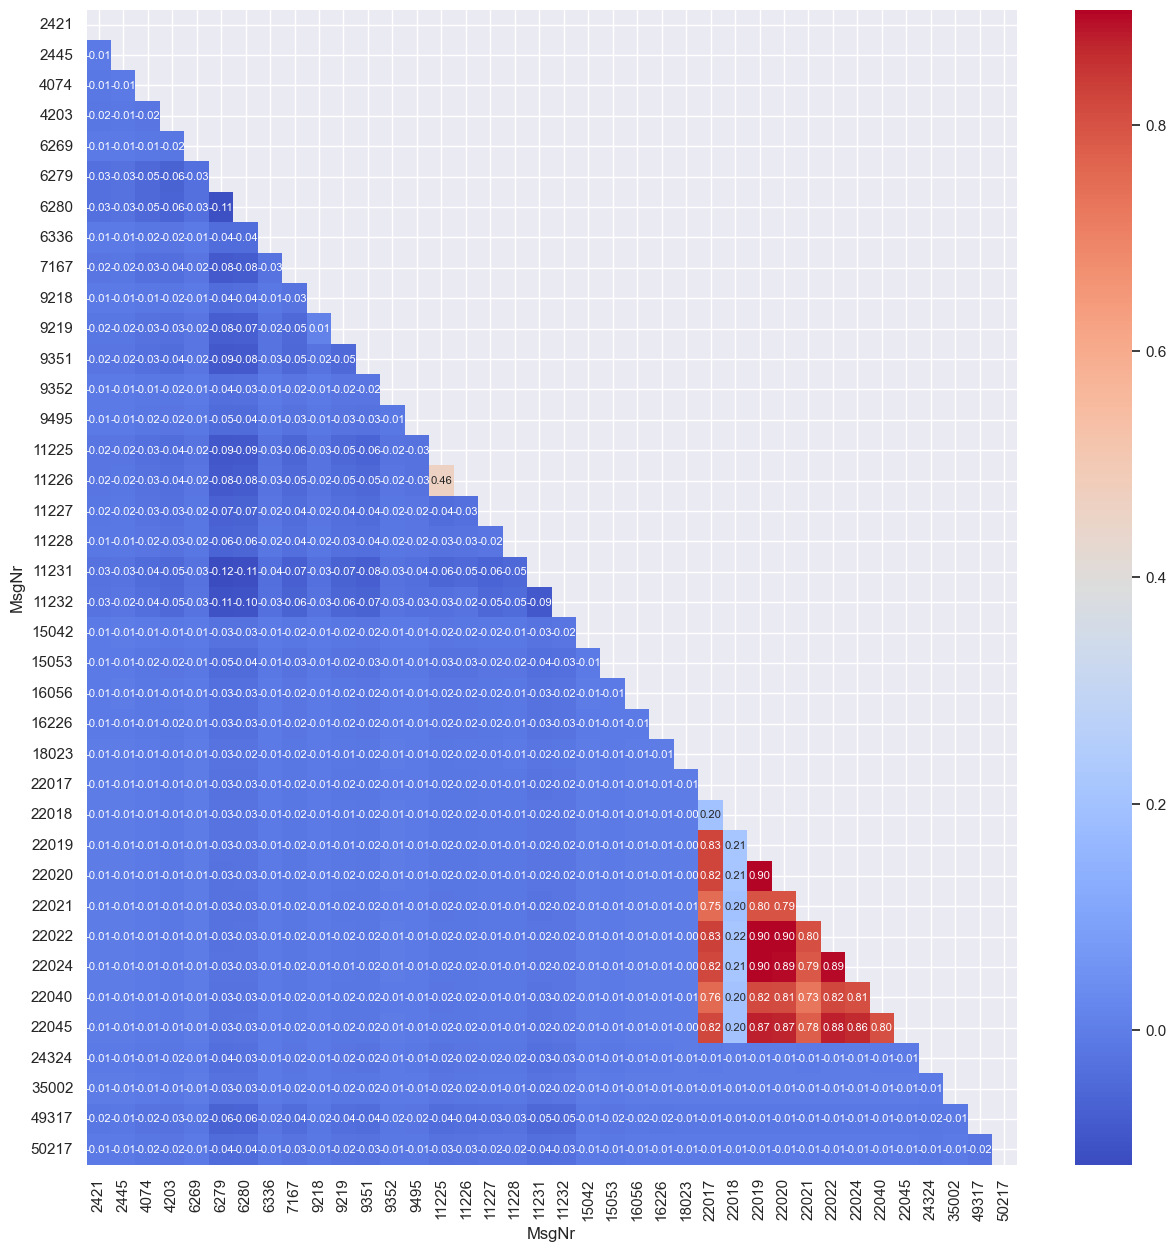

In [22]:
corr_matrix = grouped.corr()
sns.set(rc={'figure.figsize':(15,15)})
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'fontsize':8}, mask=mask)

In [10]:
import itertools

# Assuming your binary groupedset is stored in a pandas groupedFrame called 'grouped'
# Extract the columns containing binary values
columns = grouped.columns[1:]  # Exclude the DateTime column

# Create a list to store Jaccard similarity indices
jaccard_indices = []

# Iterate through all possible pairs of columns
for pair in itertools.combinations(columns, 2):
    column1, column2 = pair
    intersection = ((grouped[column1] == 1) & (grouped[column2] == 1)).sum()
    union = ((grouped[column1] == 1) | (grouped[column2] == 1)).sum()
    jaccard_index = intersection / union
    jaccard_indices.append((pair, jaccard_index))

# Print the computed Jaccard similarity indices for each pair
for pair, jaccard_index in jaccard_indices:
    print(pair, jaccard_index)

(2445, 4074) 0.0
(2445, 4203) 0.0
(2445, 6269) 0.0
(2445, 6279) 0.0
(2445, 6280) 0.0
(2445, 6336) 0.0
(2445, 7167) 0.00015599407222525544
(2445, 9218) 0.0
(2445, 9219) 0.00032181935207037116
(2445, 9351) 0.0
(2445, 9352) 0.0
(2445, 9495) 0.0
(2445, 11225) 0.0
(2445, 11226) 0.0
(2445, 11227) 0.0
(2445, 11228) 0.0
(2445, 11231) 0.0
(2445, 11232) 0.0
(2445, 15042) 0.0
(2445, 15053) 0.0
(2445, 16056) 0.0
(2445, 16226) 0.0
(2445, 18023) 0.0
(2445, 22017) 0.0
(2445, 22018) 0.0
(2445, 22019) 0.0
(2445, 22020) 0.0
(2445, 22021) 0.0
(2445, 22022) 0.0
(2445, 22024) 0.0
(2445, 22040) 0.0
(2445, 22045) 0.0
(2445, 24324) 0.00029726516052318666
(2445, 35002) 0.0
(2445, 49317) 0.0
(2445, 50217) 0.0
(4074, 4203) 9.323140033563304e-05
(4074, 6269) 0.0
(4074, 6279) 5.323112956456936e-05
(4074, 6280) 9.269988412514484e-05
(4074, 6336) 0.0
(4074, 7167) 0.0
(4074, 9218) 0.0
(4074, 9219) 0.0
(4074, 9351) 0.00023938716884774975
(4074, 9352) 0.0
(4074, 9495) 0.00013875398917718884
(4074, 11225) 0.0
(4074, 112

# Alarms five minutes before downtimes

In [26]:
grouped

MsgNr,DateTime,2421,2445,4074,4203,6269,6279,6280,6336,7167,...,22020,22021,22022,22024,22040,22045,24324,35002,49317,50217
0,2022-01-03 05:49:49,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2022-01-03 08:41:45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-01-03 08:44:22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-01-03 08:46:40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-01-03 09:07:11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234570,2023-01-31 23:58:43,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,0,0
234571,2023-01-31 23:59:13,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,0,0,0,0
234572,2023-01-31 23:59:14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
234573,2023-01-31 23:59:15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# grouped = grouped.reset_index()
grouped['DateTime'] = pd.to_datetime(grouped['DateTime'])
grouped.set_index('DateTime', inplace=True)

In [30]:
alarms=grouped.resample('1T').asfreq()
alarms = alarms.fillna(0)
alarms

MsgNr,2421,2445,4074,4203,6269,6279,6280,6336,7167,9218,...,22020,22021,22022,22024,22040,22045,24324,35002,49317,50217
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 05:49:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 05:50:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 05:51:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 05:52:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 05:53:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 23:55:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-31 23:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-31 23:57:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
downtime_df = pd.read_csv('all_downtimes_processed.csv')
downtime_df.head()

,DateTime,trigger,downtime
0,2020-01-06 10:00:00,1.0,1
1,2020-01-06 10:01:00,0.0,1
2,2020-01-06 10:02:00,0.0,1
3,2020-01-06 10:03:00,0.0,1
4,2020-01-06 10:04:00,0.0,1


In [32]:
downtime_df['DateTime'] = pd.to_datetime(downtime_df['DateTime'])
downtime_df.set_index('DateTime', inplace=True)

In [33]:
downtime_df

,trigger,downtime
DateTime,,
2020-01-06 10:00:00,1.0,1
2020-01-06 10:01:00,0.0,1
2020-01-06 10:02:00,0.0,1
2020-01-06 10:03:00,0.0,1
2020-01-06 10:04:00,0.0,1
...,...,...
2023-05-04 09:21:00,0.0,0
2023-05-04 09:22:00,0.0,0
2023-05-04 09:23:00,0.0,0


In [34]:
df = alarms.merge(downtime_df, left_index= True, right_index= True, how="left")

In [35]:
df.trigger.sum()

757.0

In [36]:
trigger_idx = df[df['trigger'] == 1].index
trigger_idx

DatetimeIndex(['2022-01-03 10:00:00', '2022-01-04 05:58:00',
               '2022-01-05 02:46:00', '2022-01-05 03:31:00',
               '2022-01-05 23:25:00', '2022-01-05 23:51:00',
               '2022-01-06 00:10:00', '2022-01-06 08:39:00',
               '2022-01-07 04:32:00', '2022-01-07 06:35:00',
               ...
               '2023-01-26 16:11:00', '2023-01-27 12:00:00',
               '2023-01-30 11:02:00', '2023-01-30 14:16:00',
               '2023-01-31 02:38:00', '2023-01-31 09:27:00',
               '2023-01-31 12:42:00', '2023-01-31 14:23:00',
               '2023-01-31 14:59:00', '2023-01-31 19:43:00'],
              dtype='datetime64[ns]', name='DateTime', length=757, freq=None)

In [37]:
selected_rows = []
selected_features = []
for idx in trigger_idx:
    start_time = idx - pd.Timedelta(5, unit='m')
    end_time = idx - pd.Timedelta(1, unit='m')
    selected_rows.append(alarms.loc[start_time : end_time])

In [38]:
selected_features = []

for idx in trigger_idx:
    start_time = idx - pd.Timedelta(minutes=5)
    end_time = idx - pd.Timedelta(minutes=1)
    selected_rows = alarms.loc[start_time:end_time]

    # Get the names of columns (features) with 1s
    feature_names = selected_rows.columns[selected_rows.eq(1).any()].tolist()
    selected_features.append(feature_names)


In [42]:
val1 = sum(1 for i in selected_features if not i)
val1

744

In [40]:
val2 = len(selected_features)
val2

757

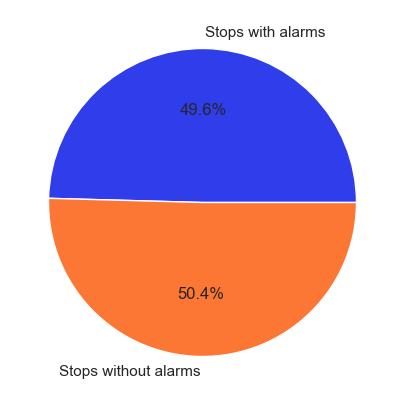

In [43]:
fig = plt.subplots(figsize=(20,5))
df2 = [val1, val2]
colors = ['#2F3EEA', '#FC7634']
plt.pie(df2, colors=colors, labels=['Stops with alarms', 'Stops without alarms'], autopct='%1.1f%%')

plt.show()

In [44]:
transactions_clean = [i for i in selected_features if i]


In [45]:
transactions_clean

[[11231],
 [4203],
 [50217],
 [50217],
 [16056],
 [50217],
 [11225, 11226],
 [11225],
 [11225, 11226],
 [11225],
 [11228],
 [11231],
 [6279]]

In [46]:
len(transactions_clean)

13

In [47]:
sublists_with_two_or_more_items = [sublist for sublist in transactions_clean if len(sublist) >= 2]

In [48]:
len(sublists_with_two_or_more_items)

2

In [49]:
sublists_with_two_or_more_items = sublists_with_two_or_more_items[:20]

In [50]:
sublists_with_two_or_more_items

[[11225, 11226], [11225, 11226]]

In [51]:
from apyori import apriori
rules = apriori(sublists_with_two_or_more_items, min_support=0.025, min_confidence=0.025, min_lift=0, min_length=2)

In [52]:
rule_list=[]

for rule in rules:
    if len(rule.items) > 1:
        sequence = ', '.join([str(item) for item in rule.items])
        support = rule.support
        confidence = rule.ordered_statistics[0].confidence
        lift = rule.ordered_statistics[0].lift
        rule_list.append((sequence, support, confidence, lift))
        print(f"Frequent sequence: {sequence}, Support: {rule.support}, Confidence: {rule.ordered_statistics[0].confidence}, Lift: {rule.ordered_statistics[0].lift}")

Frequent sequence: 11225, 11226, Support: 1.0, Confidence: 1.0, Lift: 1.0


In [54]:
del list

NameError: name 'list' is not defined

In [55]:
new_list = list(set(selected_features) - {''})

TypeError: unhashable type: 'list'

In [56]:
flattened_list = [item for sublist in selected_features for item in sublist]

In [57]:
len(flattened_list)

15

In [58]:
selected_rows

MsgNr,2421,2445,4074,4203,6269,6279,6280,6336,7167,9218,...,22020,22021,22022,22024,22040,22045,24324,35002,49317,50217
DateTime,,,,,,,,,,,,,,,,,,,,,
2023-01-31 19:38:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-31 19:39:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-31 19:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-31 19:41:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-31 19:42:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
selected_rows_df = pd.concat(selected_rows)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [39]:
selected_rows_df

,2421,2445,4203,6280,6336,7167,9218,9219,9495,11225,...,22019,22020,22021,22022,22024,22040,22045,24324,35002,49317
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 09:55:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 09:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 09:57:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 09:58:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 09:59:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 19:38:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-31 19:39:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-31 19:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
new_calculate = pd.DataFrame(data = {'small': selected_rows_df.sum(), 'big':alarms.sum() })
new_calculate = new_calculate[new_calculate['small'] != 0]
new_calculate.sort_values(by='small', ascending = False)

,small,big
7167,101.0,9171.0
11226,81.0,10098.0
6280,62.0,6893.0
11232,59.0,7086.0
4203,55.0,6812.0
11231,40.0,6368.0
9219,39.0,6162.0
49317,31.0,6761.0
24324,28.0,2365.0
11225,26.0,1824.0


In [64]:
new_calculate['percentage'] = (new_calculate['small'] / new_calculate['big']) * 100
new_calculate.sort_values(by='small', ascending = False)

,small,big,percentage
7167,101.0,9171.0,1.101298
11226,81.0,10098.0,0.802139
6280,62.0,6893.0,0.899463
11232,59.0,7086.0,0.832628
4203,55.0,6812.0,0.807399
11231,40.0,6368.0,0.628141
9219,39.0,6162.0,0.632911
49317,31.0,6761.0,0.458512
24324,28.0,2365.0,1.183932
11225,26.0,1824.0,1.425439


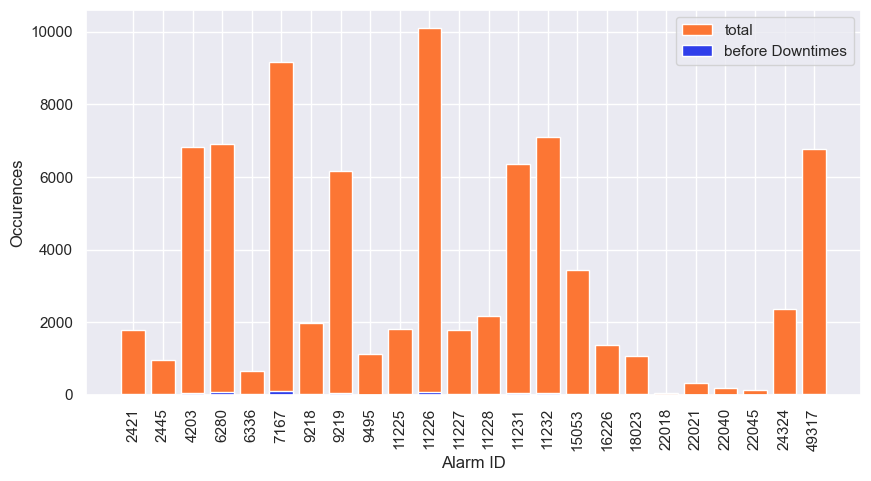

In [97]:
plt.figure(figsize=(10, 5))
# colors = ['#2F3EEA', '#FC7634']
plt.bar(new_calculate.index, new_calculate['big'], label='total', color="#FC7634")
plt.bar(new_calculate.index, new_calculate['small'], label='before Downtimes', color="#2F3EEA")

plt.xlabel('Alarm ID')
plt.ylabel('Occurences')

plt.legend()
# plt.yscale('log')

plt.grid(color='white')


plt.xticks(rotation=90)
plt.show()

In [40]:
selected_rows_df.sum().sort_values(ascending=False)

7167     101.0
11226     81.0
6280      62.0
11232     59.0
4203      55.0
11231     40.0
9219      39.0
49317     31.0
24324     28.0
11225     26.0
15053     19.0
16226     17.0
9218      16.0
11227     10.0
11228      8.0
2421       8.0
2445       7.0
18023      7.0
6336       7.0
9495       4.0
22045      2.0
22018      1.0
22021      1.0
22040      1.0
22017      0.0
22020      0.0
22022      0.0
22024      0.0
35002      0.0
22019      0.0
dtype: float64

In [53]:
alarms.sum().sort_values(ascending=False)

11226    10098.0
7167      9171.0
11232     7086.0
6280      6893.0
4203      6812.0
49317     6761.0
11231     6368.0
9219      6162.0
15053     3434.0
24324     2365.0
11228     2167.0
9218      1964.0
11225     1824.0
11227     1786.0
2421      1770.0
16226     1383.0
9495      1133.0
18023     1068.0
2445       963.0
6336       651.0
22021      329.0
22017      188.0
22040      178.0
22045      133.0
22020      124.0
22019      122.0
22024      119.0
22022      112.0
22018       53.0
35002       38.0
dtype: float64

In [41]:
alarms

,2421,2445,4203,6280,6336,7167,9218,9219,9495,11225,...,22019,22020,22021,22022,22024,22040,22045,24324,35002,49317
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 09:17:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 09:18:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 09:19:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 09:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 09:21:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 23:54:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-31 23:55:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-31 23:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
alarms['7167'].sum()

9169.0

Text(0.5, 1.0, 'GLA3_CO_258_028')

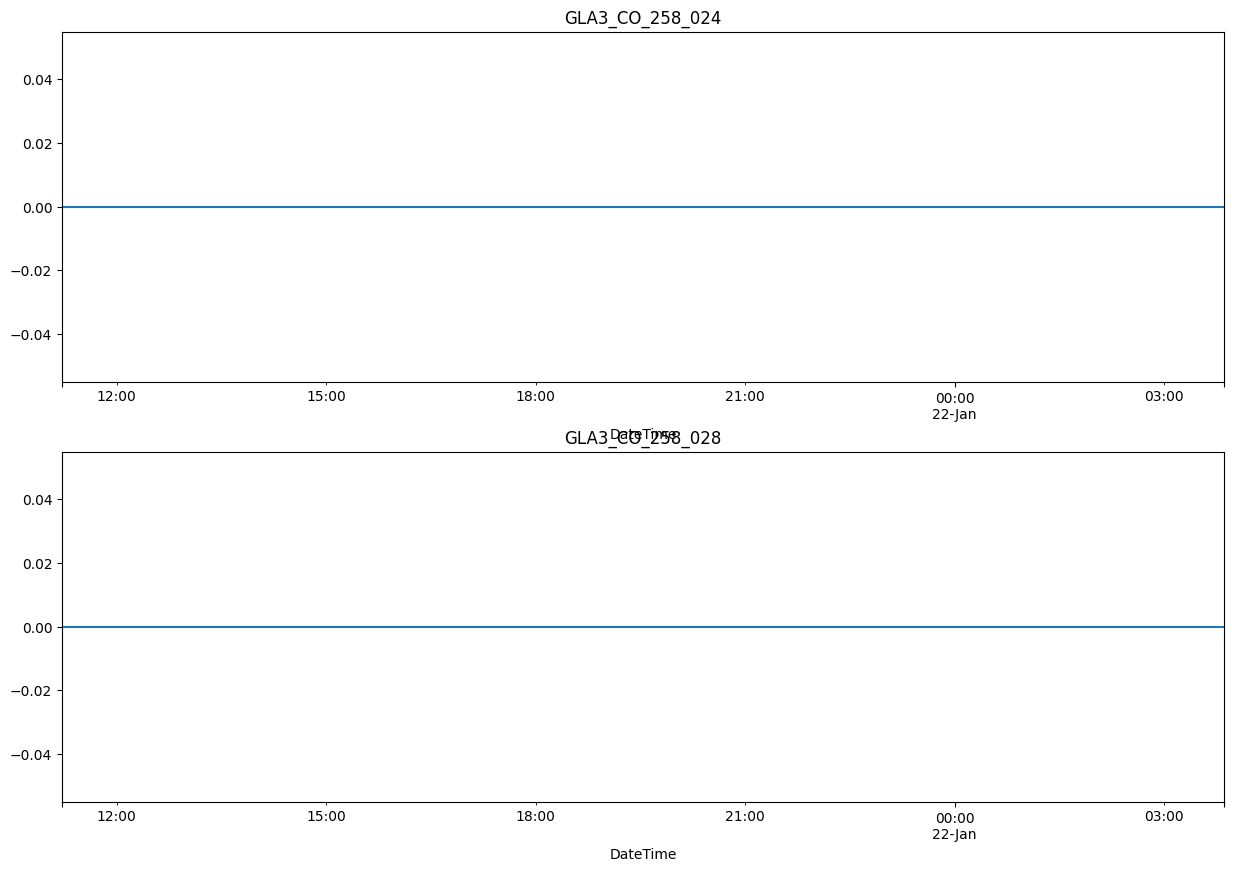

In [94]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))


alarms['11226'][26000:27000].plot(ax=ax1)
alarms['11227'][26000:27000].plot(ax=ax2)


ax1.set_title('GLA3_CO_258_024')
ax2.set_title('GLA3_CO_258_028')

